In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
train_dir = 'D:\\brain tumor\\Training'
test_dir = 'D:\\brain tumor\\Testing'


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\izhan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)


Epoch 1/20


C:\Users\izhan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 136s 717ms/step - accuracy: 0.2239 - loss: -561720256.0000 - val_accuracy: 0.2334 - val_loss: -33655824384.0000
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 118s 650ms/step - accuracy: 0.2347 - loss: -214908452864.0000 - val_accuracy: 0.2334 - val_loss: -2303295750144.0000
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 114s 626ms/step - accuracy: 0.2418 - loss: -4836613423104.0000 - val_accuracy: 0.2334 - val_loss: -22013760503808.0000
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 117s 644ms/step - accuracy: 0.2356 - loss: -33437117317120.0000 - val_accuracy: 0.2334 - val_loss: -100969362751488.0000
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 115s 630ms/step - accuracy: 0.2315 - loss: -136663250501632.0000 - val_accuracy: 0.2334 - val_loss: -314763926044672.0000
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 119s 654ms/step - accuracy: 0.2380 - loss: -390628718411776.0000 - val_accuracy: 0.2334 - val_loss: -768724252491776.0000
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 115s 632ms/step - 

In [10]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.2325 - loss: -143254639838494720.0000
Test Accuracy: 0.23340961337089539


In [11]:
test_generator.reset()
predictions = model.predict(test_generator)
y_pred = np.round(predictions).astype(int)

41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step


In [12]:
y_true = test_generator.classes

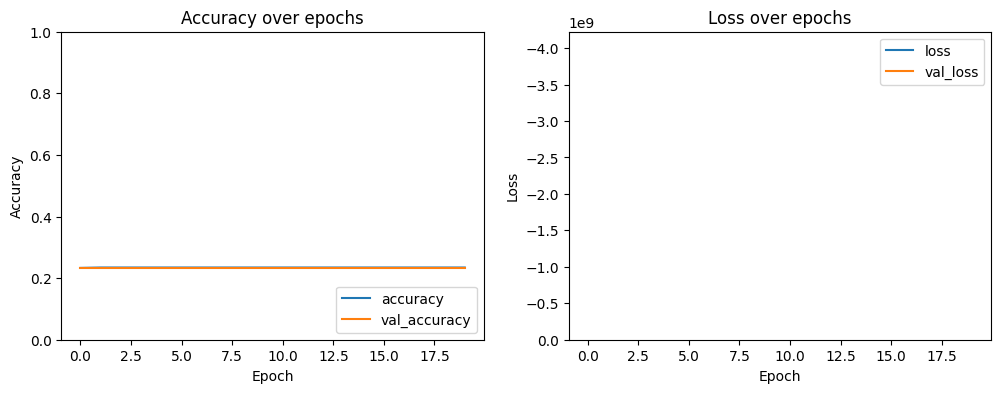

In [13]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Accuracy over epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, max(history.history['loss'])])
plt.legend(loc='upper right')
plt.title('Loss over epochs')

plt.show()


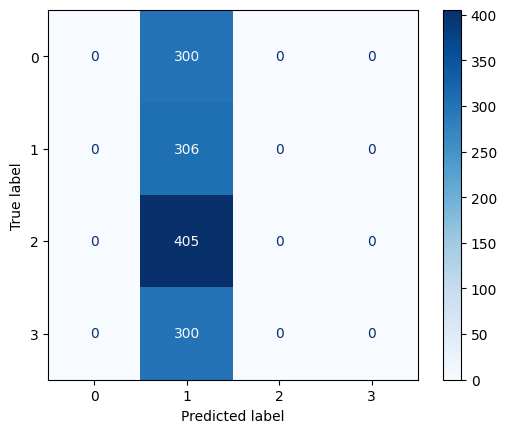

In [14]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [15]:

model.save('brain_tumor_model.keras')
